In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
crypto_df = pd.read_csv(Path('crypto_data.csv'))

In [3]:
crypto_df.rename(columns = {'Unnamed: 0':'Ticker'}, inplace = True)

In [4]:
crypto_df = crypto_df.dropna()

In [5]:
crypto_df

,Ticker,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000


In [6]:
crypto_dfx = crypto_df[crypto_df['TotalCoinsMined'] > 0]

In [7]:
crypto_dfx = crypto_dfx.drop(['Ticker', "CoinName"], axis=1)

In [8]:
crypto_final = crypto_dfx.copy()
crypto_final = crypto_final[crypto_final['IsTrading'] == True]

In [9]:
crypto_final

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,X13,True,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Equihash,True,PoW,7.296538e+06,21000000


In [10]:
crypto_clean = pd.get_dummies(data = crypto_final, columns = ["Algorithm", "ProofType"])
crypto_clean

,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,True,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,True,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,True,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,True,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,True,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,True,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,True,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,True,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,True,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Analysis
The number of columns increased drastically as the "Algorithm" column was split into columns using only 1 and 0 after running our get_dummies function

In [11]:
crypto = crypto_clean.copy()
crypto = crypto.drop(['IsTrading'], axis=1)
crypto

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Scale the data
scaler = StandardScaler().fit(crypto)

# Use the scaler on X_train and X_test
crypto_scaled = scaler.transform(crypto)

In [13]:
from sklearn.decomposition import PCA
# Initialize PCA model
pca = PCA(n_components=.9)

# Get two principal components for the data.
crypto_pca = pca.fit_transform(crypto_scaled)

In [14]:
print(crypto_pca.shape)

(532, 74)


#### Analysis
After running our PCA funtion, we were able to drop down from 98 columns to 74 columns while maintaining the same number of rows

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=200)

In [16]:
tsne_crypto = tsne.fit_transform(crypto_pca)

In [17]:
tsne_crypto.shape

(532, 2)

In [18]:
df_crypto_tsne = pd.DataFrame(
    data=tsne_crypto, columns=["test", "testx"]
)

In [19]:
# Prepare to plot the dataset

# The first column of transformed features
df_crypto_tsne['x'] = tsne_crypto[:,0]

# The second column of transformed features
df_crypto_tsne['y'] = tsne_crypto[:,1]

df_crypto_tsne = df_crypto_tsne.drop(['test', "testx"], axis=1)

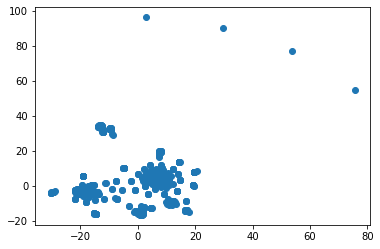

In [20]:
# Visualize the clusters
plt.scatter(df_crypto_tsne['x'],df_crypto_tsne['y'])
plt.show()

#### Observation
There seems to be 2 larger clusters and 2 smaller clusters with several points spread along the chart.

C:\Users\John Khazzaka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


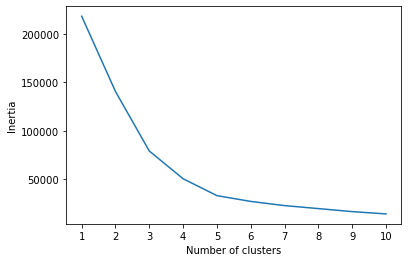

In [21]:
from sklearn.cluster import KMeans
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_tsne)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
df_elbow

,k,inertia
0,1,218680.843750
1,2,140635.234375
2,3,78950.070312
3,4,50184.917969
4,5,32705.798828
5,6,26685.537109
6,7,22364.304688
7,8,19258.201172
8,9,16130.691406
9,10,13743.078125


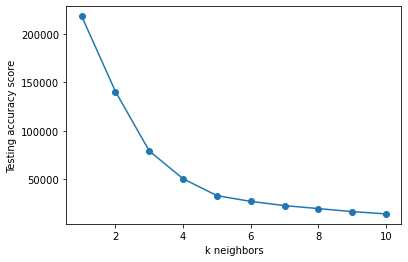

In [23]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

# Final Recommendation
Based on my chart, it seems as if the cyrptocurrencies are highly spread out with some smaller concentrations towards the lower ends of the axes. However, the elbow chart shows that the optimal number of clusters for the cryptocurrencies is 4, so I recommend placing the cryptocurrencies into 4 clusters.